# Regresión Polinómica - Bias y Variance

En éste notebook vamos a usar un dataset sintético para explorar los conceptos de regresión polinómica, overfitting y underfitting y su relación con el bias y variance cuando usamos el error cuadrático medio.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Armamos un dataset sintético

$f(x) = \frac{1}{2}x + \sqrt{max(x,0)}-cos(x)+2$

In [2]:
class Data(object):

    def __init__(self, n):
        self.X, self.y = self.build_dataset(n)

        
    @staticmethod
    def _analytic_function(X):
        return .5 * X + np.sqrt(np.max(X, 0)) - np.cos(X) + 2
        

    def build_dataset(self, n):
        N = n
        sigma_epsilon = 1
        x_max = 3
        x = x_max * (2 * np.random.rand(N) - 1)
        epsilon = sigma_epsilon * np.random.randn(N)
        y = self._analytic_function(x)
        y = y + epsilon
        return x, y

    def split(self, percentage):
        X = self.X
        y = self.y

        permuted_idxs = np.random.permutation(X.shape[0])

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test
    
    def plot_original(self):
        plt.figure(figsize=(12, 6))
        x_range = np.linspace(-3, 3, 1000)
        plt.scatter(self.X, self.y)
        plt.plot(x_range, self._analytic_function(x_range), 'r', linewidth=3.0)
        plt.xlabel('x', size=12)
        plt.ylabel('y', size=12)
        plt.xticks(np.arange(-3, 3 + 1))
        plt.show()

In [3]:
dataset = Data(1000)
X_train, X_test, y_train, y_test = dataset.split(0.8)

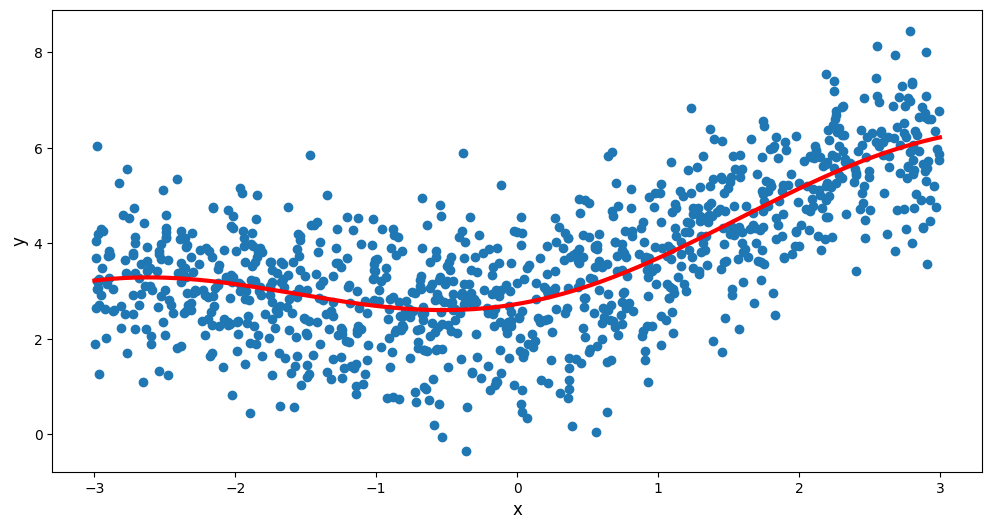

In [4]:
dataset.plot_original()

In [5]:
def f(X):
    return .5 * X + np.sqrt(np.max(X, 0)) - np.cos(X) + 2

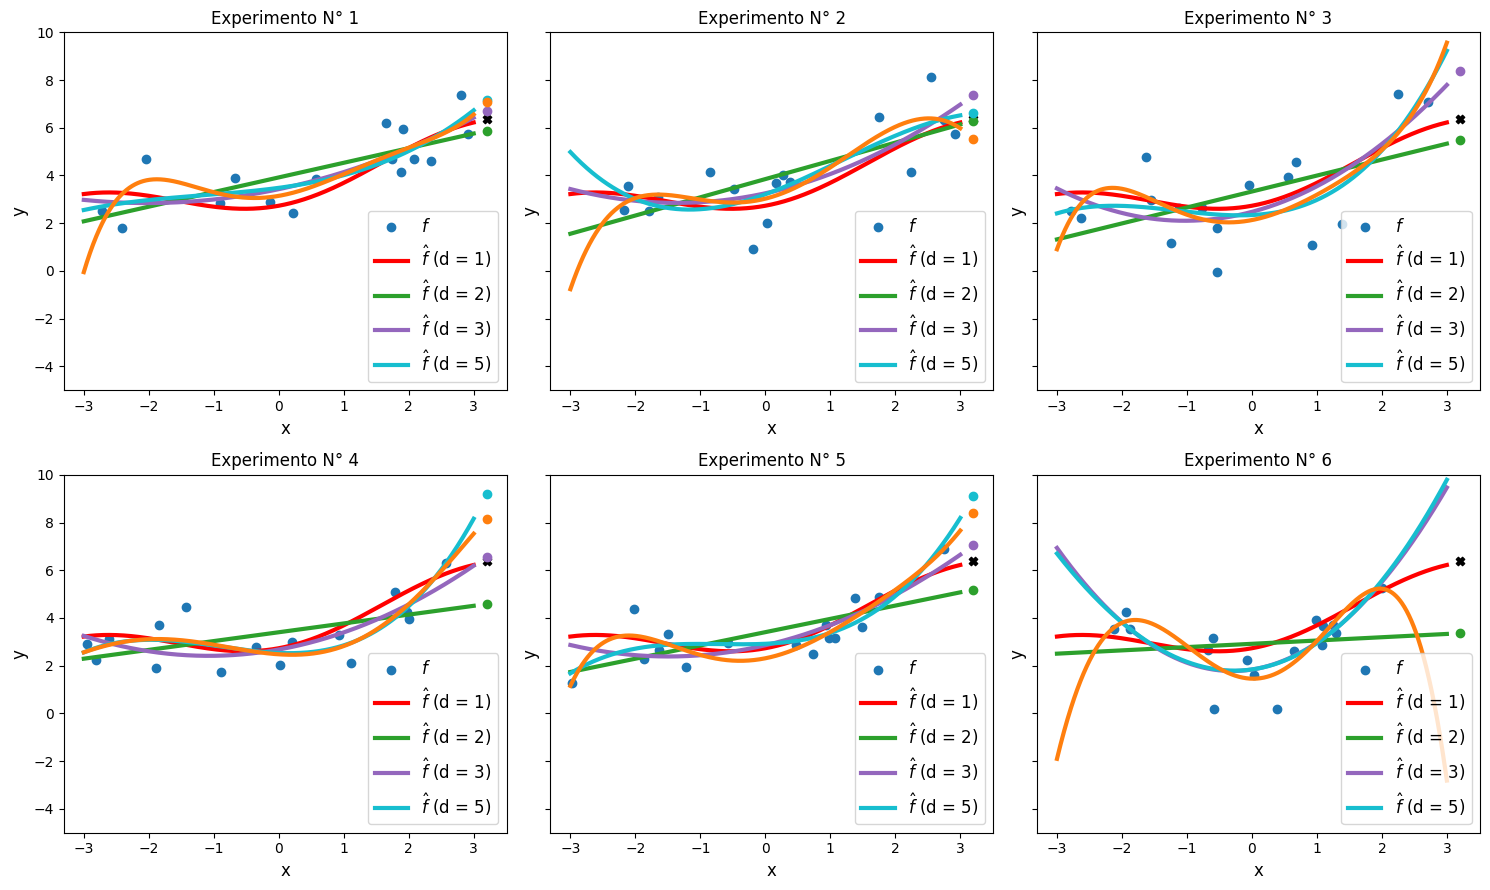

In [6]:
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

N = X_train.shape[0]
#Toma muestra n del 2% de los datos
# xx_test hace de punto de test
n = int(.02 * N)
xx_test = 3.2
yy_test = f(xx_test)
x_range = np.linspace(-3, 3, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])

# Polinomios
d_arr = [1, 2, 3, 5]

cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
for i in range(2):
    for j in range(3):
        w = []
        #Toma la muestra aleatoria de tamaño n%
        idx = np.random.permutation(N)[:n]
        xx_train, yy_train = X_train[idx], y_train[idx]
        
        for d in d_arr:
            w.append(np.polyfit(xx_train, yy_train, d))
                
                
        axs[i, j].scatter(xx_train, yy_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
            
        axs[i, j].scatter(xx_test, yy_test, c='k', marker="X", zorder = 0)
        for k in range(len(w)):
            axs[i, j].scatter(xx_test, f_hat(xx_test, w[k]), c=colors[k])
                
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$', r'$\hat{f}$ (d = 1)', r'$\hat{f}$ (d = 2)', 
                          r'$\hat{f}$ (d = 3)', r'$\hat{f}$ (d = 5)'], fontsize=12)
        axs[i, j].title.set_text('Experimento N° {}'.format(cnt))
        axs[i, j].set_ylim(-5,10)
        cnt += 1
plt.tight_layout()
plt.show()

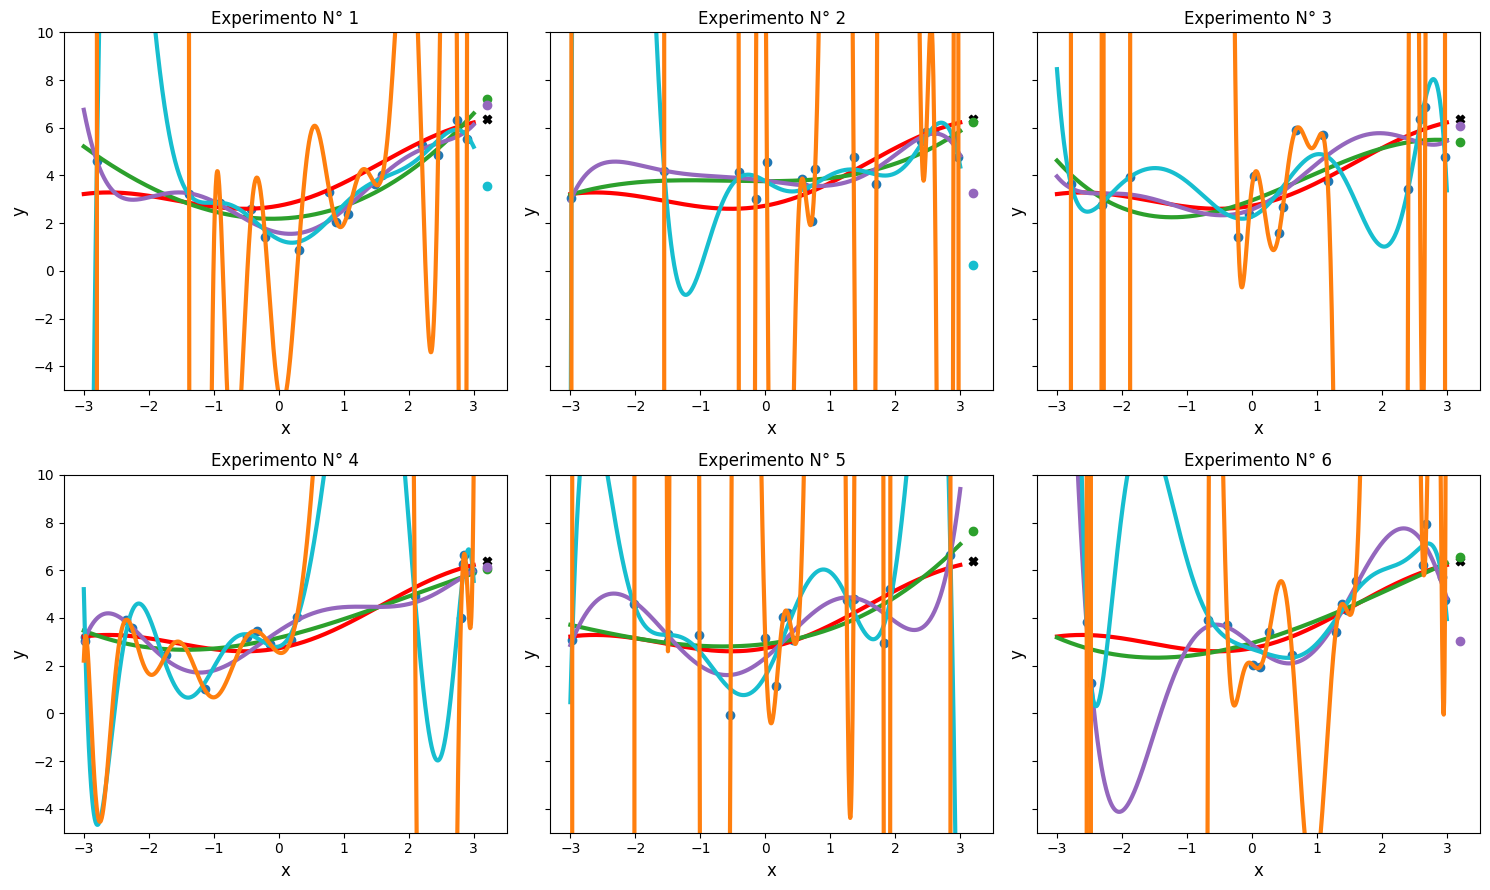

In [7]:
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

N = X_train.shape[0]
#Toma muestra n del 2% de los datos
# xx_test hace de punto de test
n = int(.02 * N)
xx_test = 3.2
yy_test = f(xx_test)
x_range = np.linspace(-3, 3, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])

# Polinomios
d_arr = [1, 2, 3, 5]

cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
for i in range(2):
    for j in range(3):
        w = []
        #Toma la muestra aleatoria de tamaño n%
        idx = np.random.permutation(N)[:n]
        xx_train, yy_train = X_train[idx], y_train[idx]
        
        for d in d_arr:
            w.append(np.polyfit(xx_train, yy_train, d*3))
                
                
        axs[i, j].scatter(xx_train, yy_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
            
        axs[i, j].scatter(xx_test, yy_test, c='k', marker="X", zorder = 0)
        for k in range(len(w)):
            axs[i, j].scatter(xx_test, f_hat(xx_test, w[k]), c=colors[k])
                
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)

        axs[i, j].title.set_text('Experimento N° {}'.format(cnt))
        axs[i, j].set_ylim(-5,10)
        cnt += 1
plt.tight_layout()
plt.show()

In [8]:
xx_test

3.2

Comparación del valor verdadero f(x) en un punto dado y la distribución de valores predichos con predictores entrenados con diferentes muestras aleatorias.

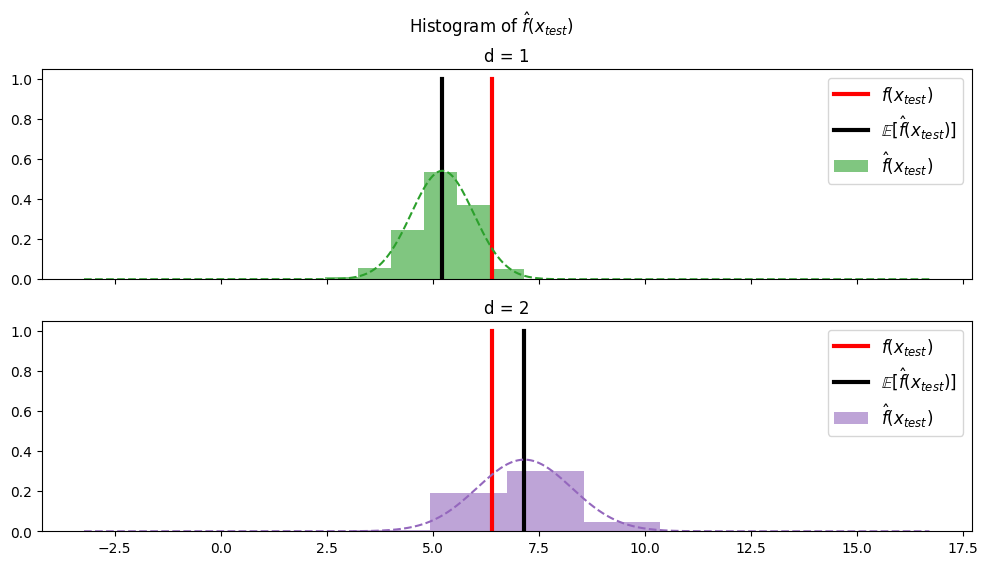

In [9]:
R = 10000
d_arr = [1, 2, 3, 5]
y_hat_test = np.zeros((len(d_arr), R))

for r in range(R):
    # Toma 2% de los datos
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    xx_train, yy_train = X_train[idx], y_train[idx]
    
    # Predice y registra para cada grado de polinomio
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(xx_train, yy_train, d)
        y_hat_test[k, r] = f_hat(xx_test, w)
        
#Media y std de cada vector de predicciones
y_hat_test_mean = np.mean(y_hat_test, 1)
y_hat_test_std = np.std(y_hat_test, 1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))
for k in range(2):
    #Histograma de la prediccion
    axs[k].hist(y_hat_test[k], density=True, color=colors[k], alpha=0.6)             
    xlim = axs[k].get_xlim()
    #Marca el valor del punto test tomado
    axs[k].plot([f(xx_test), f(xx_test)], [0, 1], 'r', linewidth=3.0)
    #Media de la predicción
    axs[k].plot([y_hat_test_mean[k], y_hat_test_mean[k]], [0, 1], c='k', linewidth=3.0)
    axs[k].title.set_text('d = {}'.format(d_arr[k]))
    axs[k].legend([r'$f(x_{test})$', r'$\mathbb{E}[\hat{f}(x_{test})]$', r'$\hat{f}(x_{test})$'], fontsize=12)
    
for k in range(2):
    x_range = np.linspace(xlim[0], xlim[1], 1000)
    axs[k].plot(x_range, stats.norm.pdf(x_range, y_hat_test_mean[k], y_hat_test_std[k]), color=colors[k], ls='--')
    
plt.suptitle(r'Histogram of $\hat{f}(x_{test})$', size=12)
plt.show()

Ejemplo de bias-variance tradeoff con ajustes polinómicos sobre los datos generados. 

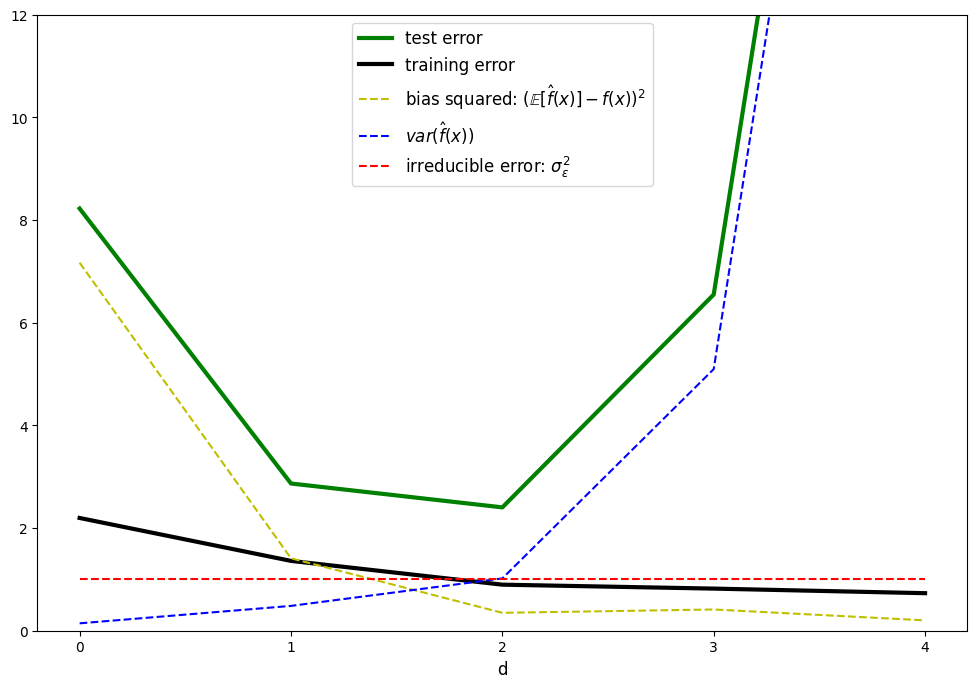

In [10]:
R = 10000
n = int(.02 * N)
n_test = 1000
d_arr = np.arange(5)
x_max = 3
sigma_epsilon = 1

xx_test = x_max + np.random.rand(n_test) - .5  # shape: (n_test,)
epsilon = sigma_epsilon * np.random.randn(n_test)  # shape: (n_test,)
yy_test = f(xx_test) + epsilon  # shape: (n_test,)

train_squared_error = np.zeros((len(d_arr), R))  # shape: (len(d_arr), R)
y_hat_test = np.zeros((len(d_arr), R, n_test))  # shape: (len(d_arr), R, n_test)
for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    xx_train, yy_train = X_train[idx], y_train[idx]  # shape: (n,), (n,)
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(xx_train, yy_train, d)
        train_squared_error[k, r] = np.mean((yy_train - f_hat(xx_train, w)) ** 2)  # train MSE for a specific realization
        y_hat_test[k, r, :] = f_hat(xx_test, w)  # test set predictions for a specific realization

test_squared_error = np.mean((y_hat_test - yy_test) ** 2, 1)  # shape: (len(d_arr), n_test)
bias_squared = (np.mean(y_hat_test, 1) - f(xx_test)) ** 2  # shape: (len(d_arr), n_test)
var_y_hat_test = np.var(y_hat_test, 1)  # shape: (len(d_arr), n_test)

plt.figure(figsize=(12, 8))
plt.plot(d_arr, np.mean(test_squared_error, 1), 'g', linewidth=3.0)  # np.mean(test_squared_error, 1) shape: (len(d_arr),)
plt.plot(d_arr, np.mean(train_squared_error, 1), 'k', linewidth=3.0)  # np.mean(train_squared_error, 1) shape: (len(d_arr),)
plt.plot(d_arr, np.mean(bias_squared, 1), 'y--')  # np.mean(bias_squared, 1) shape: (len(d_arr),)
plt.plot(d_arr, np.mean(var_y_hat_test, 1), 'b--')  # np.mean(var_y_hat_test, 1) shape: (len(d_arr),)
plt.plot(d_arr, (sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')
# plt.plot(d_arr, np.mean(bias_squared + var_y_hat_test + sigma_epsilon ** 2, 1), 'm--')
plt.xticks(d_arr)
plt.xlabel('d', size=12)
plt.legend(['test error', 'training error', r'bias squared: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
            r'$var(\hat{f}(x))$', r'irreducible error: $\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
plt.ylim([0, 12])
plt.show()

### Bibliografía
* The Bias-Variance Tradeoff - Giorgos Papachristoudis